In [41]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:

spotify_song_data= pd.read_csv("E:/project mini/song_data.csv")
spotify_song_info= pd.read_csv("E:/project mini/song_info.csv")


In [44]:
spotify_song_info.head(5)

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [45]:
song_info=spotify_song_info.copy()
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [46]:
song_data.shape

(18835, 15)

In [47]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [48]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [49]:
a=song_data[song_data["popularity"]==1]
a.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [50]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [69]:
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))


In [70]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [72]:

X = song_data.iloc[:, :-1]
y = song_data.iloc[:, -1]


In [73]:
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474
1,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370
2,231733.0,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324
3,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198
4,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574


In [74]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: popularity, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [77]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")


In [78]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [79]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [80]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [81]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [82]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.7132333421821078
Test score : 0.7005574727900186
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8206132200690205
Test score : 0.7215290682240509
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.7132333421821078
Test score : 0.7005574727900186
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 0.9955534908415185
Test score : 0.8112556410937085
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 0.9955534908415185
Test score : 0.880541544996018


In [83]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[2567,   72],
       [ 389,  739]], dtype=int64)

In [84]:

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2567,72,2639
1,389,739,1128
All,2956,811,3767


In [86]:
song_data['popularity'].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [87]:

from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2639
           1       0.91      0.66      0.76      1128

    accuracy                           0.88      3767
   macro avg       0.89      0.81      0.84      3767
weighted avg       0.88      0.88      0.87      3767



In [89]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.08      , 1.        , 0.365     , ..., 1.        , 0.295     ,
       0.17666667])

In [90]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.78931413e-04
 3.78931413e-04 3.78931413e-04 3.78931413e-04 3.78931413e-04
 3.78931413e-04 1.51572565e-03 2.27358848e-03 2.27358848e-03
 2.27358848e-03 2.27358848e-03 2.27358848e-03 2.27358848e-03
 2.27358848e-03 2.27358848e-03 2.27358848e-03 2.27358848e-03
 3.03145131e-03 3.03145131e-03 3.03145131e-03 3.03145131e-03
 3.03145131e-03 3.41038272e-03 3.78931413e-03 4.16824555e-03
 4.16824555e-03 4.16824555e-03 4.16824555e-03 4.92610837e-03
 5.30503979e-03 5.30503979e-03 6.06290261e-03 6.06290261e-03
 6.44183403e-03 6.44183403e-03 6.82076544e-03 6.82076544e-03
 6.82076544e-03 6.82076544e-03 7.19969685e-03 7.19969685e-03
 7.19969685e-03 9.09435392e-03 9.47328534e-03 9.85221675e-03
 9.85221675e-03 9.85221675e-03 1.02311482e-02 1.02311482e-02
 1.02311482e-02 1.02311482e-02 1.09890110e-02 1.17468738e-02
 1.17468738e-02 1.17468738e-02 1.21258052e-02 1.28836681e-02
 1.36415309e-02 1.40204623e-02 1.40204623e-02 1.43993937e-02
 1.43993937e-02 1

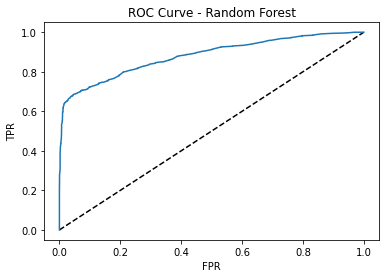

In [91]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

In [99]:

roc_auc_score(y_test,y_pred_prob)

0.8810975036213481

In [93]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.8798116095670403 0.007875719644030143


In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [97]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.8809401191958554
best_parameters =  {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300}


In [98]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[2572,   67],
       [ 389,  739]], dtype=int64)

In [100]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2639
           1       0.92      0.66      0.76      1128

    accuracy                           0.88      3767
   macro avg       0.89      0.81      0.84      3767
weighted avg       0.88      0.88      0.87      3767



In [101]:
filename = 'songspopularity.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [103]:
y_pred = classifier_forest.predict(X_test)

In [104]:
confusion_matrix(y_test, y_pred)

array([[2572,   67],
       [ 389,  739]], dtype=int64)